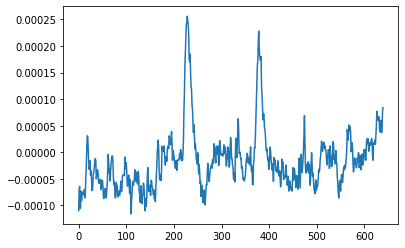

In [64]:
from scipy import fftpack
import sys
from mne.io import read_raw_edf
import numpy as np
import matplotlib.pyplot as plt

time_start = int(8.4 * 640)
time_end = int(time_start + 640)
raw = read_raw_edf("../files/S003/S003R06.edf", preload=True, stim_channel='auto', verbose=False)
get_data = raw.get_data()
data = get_data[6][time_start:time_end]
plt.plot(data)

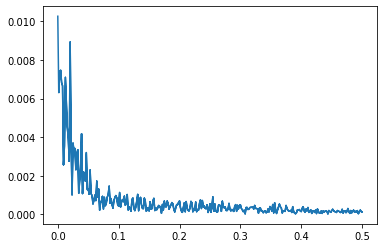

In [65]:
fourrier = fftpack.fft(data)
abs_fourrier = np.abs(fourrier)
freq = fftpack.fftfreq(len(data))
plt.plot(np.abs(freq), abs_fourrier)

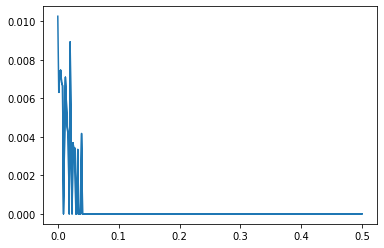

In [68]:
fourrier_sort = np.sort(fourrier.real)
val_filter = fourrier_sort[::-1][9]
fourrier[abs_fourrier < val_filter] = 0
plt.plot(np.abs(freq), np.abs(fourrier))

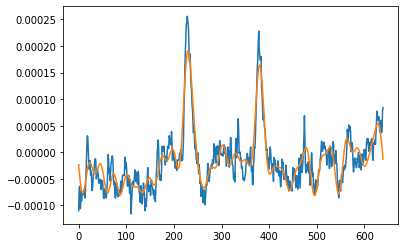

In [69]:
ifourrier = fftpack.ifft(fourrier)
plt.plot(data)
plt.plot(ifourrier.real)
plt.show()